In [1]:
import numpy as np
import torch, torch.nn
import matplotlib.pyplot as plt
from torch.nn import Linear, Tanh

In [2]:
x=np.arange(0,10,0.01).reshape(-1,1)

In [3]:
x.shape

(1000, 1)

In [86]:
f=0.1*x**2-0.5*x

In [87]:
f.shape

(1000, 1)

In [88]:
sigma = 0.02

In [89]:
f_noise = f + sigma*np.random.randn(f.size,1)

In [90]:
f_noise.shape

(1000, 1)

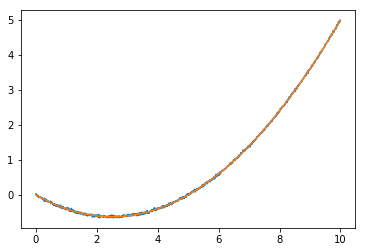

In [91]:
plt.plot(x,f_noise)
plt.plot(x,f)

In [92]:
X_train=torch.tensor(x,dtype=torch.float32)
y_train=torch.tensor(f_noise,dtype=torch.float32)

In [93]:
network=torch.nn.Sequential(Linear(1,20),Tanh(),Linear(20,20),Tanh(),Linear(20,20),Tanh(),Linear(20,20),Tanh(),Linear(20,20),Tanh(),Linear(20,20),Tanh(),Linear(20,20),Tanh(),Linear(20,1))

In [94]:
prediction=network(X_train)

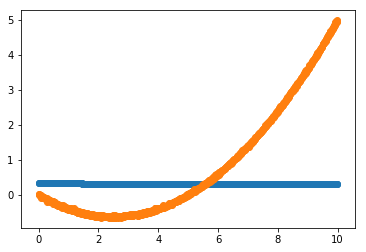

In [95]:
plt.scatter(X_train.detach().numpy(),prediction.detach().numpy())
plt.scatter(x,f_noise)

In [96]:
loss_MSE = torch.nn.MSELoss()
loss_PI = torch.nn.MSELoss()

In [97]:
weight_vector = torch.ones((2, 1), dtype=torch.float32, requires_grad=True)

In [98]:
optimizer = torch.optim.Adam([{'params':network.parameters()}, {'params': weight_vector}])

In [106]:
for iteration in np.arange(5000):
    optimizer.zero_grad() # Callibration
    prediction=network(X_train)
    f = prediction + weight_vector[0]*X_train**2 + weight_vector[1]*X_train
    loss=loss_MSE(prediction,y_train) +loss_PI(f, torch.zeros_like(f)) 
    loss.backward()#measures all gradients
    optimizer.step()
    if iteration % 500 ==0: #prints every 500
        print(iteration,loss)

0 tensor(0.8931, grad_fn=<AddBackward0>)
500 tensor(0.7441, grad_fn=<AddBackward0>)
1000 tensor(0.5895, grad_fn=<AddBackward0>)
1500 tensor(0.4381, grad_fn=<AddBackward0>)
2000 tensor(0.3134, grad_fn=<AddBackward0>)
2500 tensor(0.1862, grad_fn=<AddBackward0>)
3000 tensor(0.1015, grad_fn=<AddBackward0>)
3500 tensor(0.0471, grad_fn=<AddBackward0>)
4000 tensor(0.0178, grad_fn=<AddBackward0>)
4500 tensor(0.0053, grad_fn=<AddBackward0>)


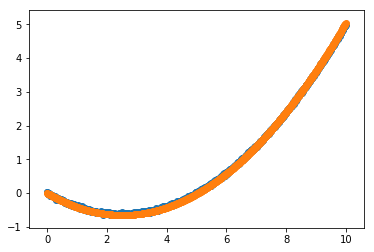

In [107]:
plt.scatter(x,f_noise)
plt.scatter(X_train.detach().numpy(),prediction.detach().numpy())

In [108]:
weight_vector

tensor([[0.1039],
        [0.5311]], requires_grad=True)

In [84]:
np.concatenate(x,f_noise,axis=0)

TypeError: only integer scalar arrays can be converted to a scalar index

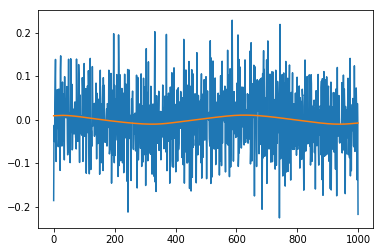

In [102]:
plt.plot(np.gradient(f_noise.reshape(-1),1))
plt.plot(np.gradient(prediction.detach().numpy().reshape(-1),1))

In [96]:
f_noise.reshape(-1)

array([ 1.39120475e-01, -4.71186714e-02,  7.82544810e-02, -7.26357410e-02,
       -2.27180894e-02,  2.10571743e-03,  1.52117986e-01,  2.78911257e-01,
        1.55561362e-02,  8.62144331e-02,  1.11665976e-01,  4.46576088e-02,
        1.15503984e-01,  1.82558394e-01,  2.21084491e-01,  1.54470243e-01,
        9.64269865e-02,  6.49665217e-02,  2.36945222e-01,  1.87067409e-01,
        2.50537387e-01,  1.05887534e-01,  1.67463369e-02,  3.35994042e-01,
        3.10015785e-01,  2.43496952e-01,  3.51843114e-01,  3.31177688e-01,
        2.30024324e-01,  2.78680556e-01,  4.02724546e-01,  2.11490741e-01,
        3.06105400e-01,  2.47262909e-01,  4.22746766e-01,  1.83749495e-01,
        2.37324905e-01,  3.81278681e-01,  2.74654757e-01,  4.77384987e-01,
        3.34156216e-01,  4.86267313e-01,  3.43721023e-01,  4.96576158e-01,
        4.95741689e-01,  5.91918184e-01,  3.99906503e-01,  4.29727514e-01,
        3.05073320e-01,  5.80853780e-01,  5.82765111e-01,  5.98925546e-01,
        4.34640841e-01,  

In [53]:
network

Sequential(
  (0): Linear(in_features=1, out_features=20, bias=True)
  (1): Tanh()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): Tanh()
  (4): Linear(in_features=20, out_features=20, bias=True)
  (5): Tanh()
  (6): Linear(in_features=20, out_features=1, bias=True)
)